In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/train_dataset.csv')
df.head(n=5)

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


Let's check if the target variable (slice type) is balanced or not!

<ipython-input-15-a0b6091b970a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_df.index, y=plot_df['Count'], palette='viridis')


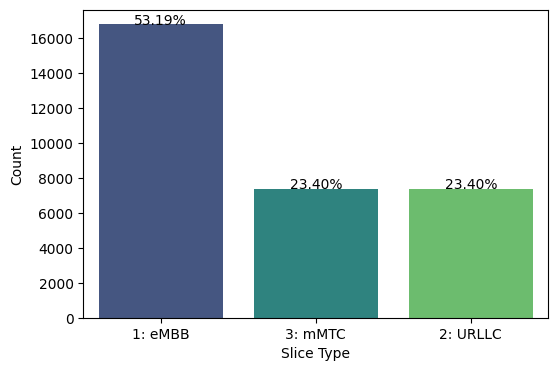

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts of each class
counts = df['slice Type'].value_counts()

# Calculate the percentage of each class
percentages = counts / len(df) * 100

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Replace the numbers with the corresponding class names
plot_df.index = plot_df.index.map({1: '1: eMBB', 2: '2: URLLC', 3: '3: mMTC'})

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=plot_df.index, y=plot_df['Count'], palette='viridis')

# Add the percentage on top of each bar
for i in range(plot_df.shape[0]):
    plt.text(i, plot_df['Count'].iloc[i], f'{plot_df["Percentage"].iloc[i]:.2f}%', ha='center')

# Show the plot
plt.xlabel('Slice Type')
plt.show()


In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31583 entries, 0 to 31582
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LTE/5g Category       31583 non-null  int64  
 1   Time                  31583 non-null  int64  
 2   Packet Loss Rate      31583 non-null  float64
 3   Packet delay          31583 non-null  int64  
 4   IoT                   31583 non-null  int64  
 5   LTE/5G                31583 non-null  int64  
 6   GBR                   31583 non-null  int64  
 7   Non-GBR               31583 non-null  int64  
 8   AR/VR/Gaming          31583 non-null  int64  
 9   Healthcare            31583 non-null  int64  
 10  Industry 4.0          31583 non-null  int64  
 11  IoT Devices           31583 non-null  int64  
 12  Public Safety         31583 non-null  int64  
 13  Smart City & Home     31583 non-null  int64  
 14  Smart Transportation  31583 non-null  int64  
 15  Smartphone         

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
count,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000
mean,10.974923,11.476459,0.003079,114.126745,0.468100,0.531900,0.441187,0.558813,0.106291,0.057943,0.116107,0.057879,0.059716,0.117722,0.058734,0.425609,1.702150
std,6.053641,6.915643,0.004344,106.320976,0.498989,0.498989,0.496537,0.496537,0.308215,0.233639,0.320358,0.233519,0.236963,0.322283,0.235130,0.494443,0.822956
min,1.000000,0.000000,0.000001,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,6.000000,0.000001,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,11.000000,11.000000,0.001000,75.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,16.000000,17.000000,0.010000,150.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,22.000000,23.000000,0.010000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
